In [1]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython
import pickle
np.random.seed(42)


In [2]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import delta_function, transform_pd

from utils import viz as viz_utils

from agent import Person

from model import TaxFraudModel


In [56]:
# with open('data/expis/19_09/df_s_uni_dec.pkl_None_uniform_GT.pkl', "rb") as f:
#     ten = pickle.load(f) 

# with open('data/expis/19_09/df_s_uni_dec.pkl_None_uniform_None.pkl', "rb") as f:
#     nine = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_appeal_hist_None.pkl', "rb") as f:
    eight = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_appeal_hist_GT.pkl', "rb") as f:
    seven = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_None_hist_None.pkl', "rb") as f:
    six = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_None_hist_GT.pkl', "rb") as f:
    five = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_appeal_hist_GT.pkl', "rb") as f:
    four = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_appeal_hist_None.pkl', "rb") as f:
    three = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_None_hist_GT.pkl', "rb") as f:
    two = pickle.load(f) 

with open('data/expis/19_09_3/df_s_hist.pkl_None_hist_None.pkl', "rb") as f:
    one = pickle.load(f) 

# sns.histplot(mlp['wealth'])


dfs = [one, two, three, four, five, six,seven, eight] #,nine, ten]
data = []
for df in dfs:
    df = transform_pd(df)
    data.append(df)

data[1]



/Users/uni/Documents/Git/abm/basic/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['intersect'] = list(df_baseline['gender'])
/Users/uni/Documents/Git/abm/basic/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['intersect'] = list(df_baseline['gender'])
/Users/uni/Documents/Git/abm/basic/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         1      1    0.048751  0.37454         1.0    0.0     0       1   
                 2    0.000000  0.37454         1.0    0.0     0       1   
                 3    0.000000  0.37454         0.0    0.0     0       1   
                 4    0.000000  0.37454         0.0    0.0     0       1   
                 5    0.000000  0.37454         1.0    0.0     0       1   
...                        ...      ...         ...    ...   ...     ...   
19        750    96   0.000000  0.37454         1.0    1.0     0       0   
                 97   0.000000  0.37454         1.0    0.0     0       0   
                 98   0.000000  0.37454         1.0    0.0     0       0   
                 99   0.000000  0.37454         1.0    1.0     0       0   
                 100  0.000000  0.37454         1.0    1.0     0       0   

                      convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                            
0         1      1            1    0.939898  0.581704    0.985602  0.929674   
                 2            1    0.827122  0.747054    0.853852  0.769335   
                 3            1    0.771833  0.780272    0.948146  0.862066   
                 4            1    0.734908  0.709941    0.923182  0.842153   
                 5            1    0.937589  0.793041    0.952585  0.854904   
...                         ...         ...       ...         ...       ...   
19        750    96           1    0.737935  0.850000    0.885875  0.863073   
                 97           1    0.761568  0.748915    0.875851  0.794669   
                 98           1    0.869342  0.703030    0.935386  0.901726   
                 99           1    0.736398  0.744094    0.817918  0.876874   
                 100          1    0.682499  0.719557    0.892646  0.909746   

                      eval_acc  misclassifications intersect  
iteration obj_id t                                            
0         1      1    0.512000                 1.0        mw  
                 2    0.466667                 1.0        mw  
                 3    0.477333                 0.0        mw  
                 4    0.454667                 0.0        mw  
                 5    0.470667                 1.0        mw  
...                        ...                 ...       ...  
19        750    96   0.388000                 0.0        fw  
                 97   0.365333                 1.0        fw  
                 98   0.354667                 1.0        fw  
                 99   0.378667                 0.0        fw  
                 100  0.346667                 0.0        fw  

[1500000 rows x 14 columns]

## Visualization

In [4]:
def viz2(data, y):
    fig, axes = plt.subplots(2,5, figsize = (60,60))

    for i, ax in zip(data, axes.flat):
        sns.lineplot(data = i,
                    x = i.index.get_level_values('t'),
                    y = i[y],
                    ax = ax,
                    marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)

    plt.show()

def viz(data, y, hue, title = None):
    fig, axes = plt.subplots(2,5, figsize = (20,20))
    # fig = plt.figure(figsize=(10,60))
    no = 0
    for i, ax in (zip(data, axes.flat)):
        
        # no +=1
        sns.lineplot(ax = ax,
                    data = i,
                    x = i.index.get_level_values('t'),
                    y = i[y],
                    hue = hue,
                    marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)
        # title = ('{}').format(no)
        # ax.title.set_text(title)

    plt.show()

<AxesSubplot: xlabel='t', ylabel='eval_acc'>

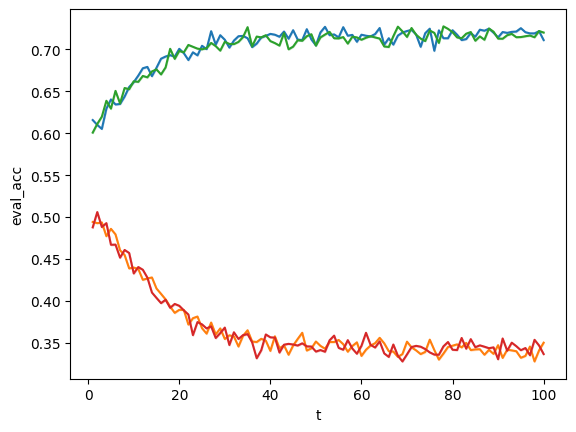

In [38]:
sns.lineplot(   x =  data[0].index.get_level_values('t'),
                y = data[0]['eval_acc'])
sns.lineplot(   x =  data[1].index.get_level_values('t'),
                y = data[1]['eval_acc'])
sns.lineplot(   x =  data[2].index.get_level_values('t'),
                y = data[2]['eval_acc'])
sns.lineplot(   x =  data[3].index.get_level_values('t'),
                y = data[3]['eval_acc'])

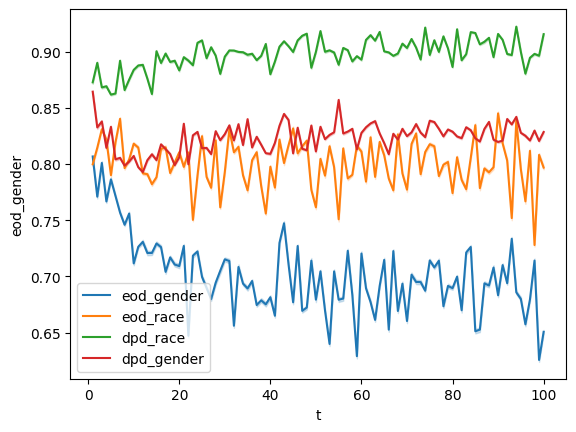

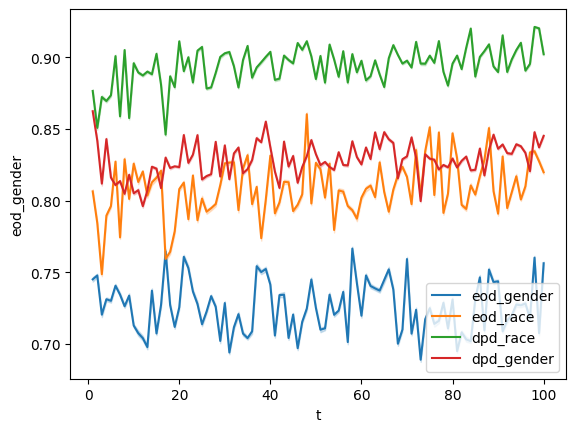

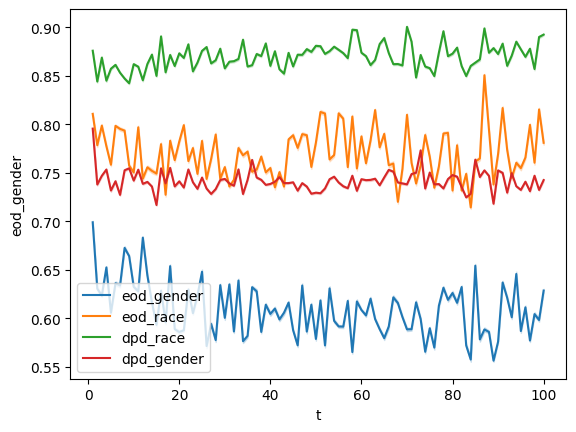

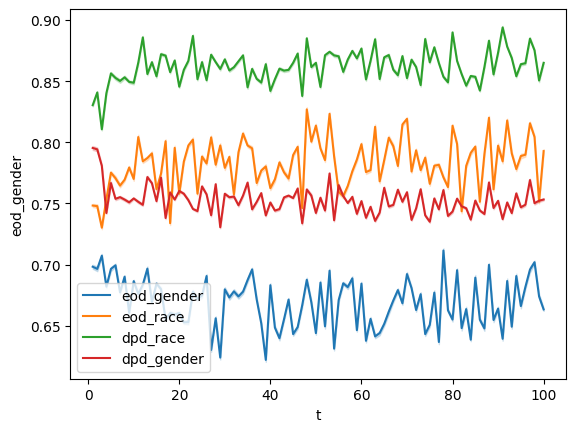

In [57]:
def viz_fairness(data_list):
    for i in range(len(data_list)):
        sns.lineplot(   x =  data_list[i].index.get_level_values('t'),
                        y = data_list[i]['eod_gender'], label = 'eod_gender')

        sns.lineplot(   x =  data_list[i].index.get_level_values('t'),
                        y = data_list[i]['eod_race'], label = 'eod_race')
        sns.lineplot(   x =  data_list[i].index.get_level_values('t'),
                        y = data_list[i]['dpd_race'], label = 'dpd_race')
        sns.lineplot(   x =  data_list[i].index.get_level_values('t'),
                        y = data_list[i]['dpd_gender'], label = 'dpd_gender')


        # # plt.ylim(0,0.2)
        # plt.xlim(0,50)

        plt.show()

viz_fairness(data)

In [ ]:
# fig, axes = plt.subplots(2,2)

# for i, ax in zip(data, axes.flat):
#     sns.histplot(i['intersect'], ax = ax)
#     # # plt.ylim(0,0.2)
#     # plt.xlim(0,50)

# plt.show()



In [ ]:
# fig, ax = plt.subplots(2,2)

# for i in dfs:
#     viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['race'], title= 'MLP Classifier') #, df_baseline['convicted'])

#     # # plt.ylim(0,0.2)
#     # plt.xlim(0,50)

#     plt.show()


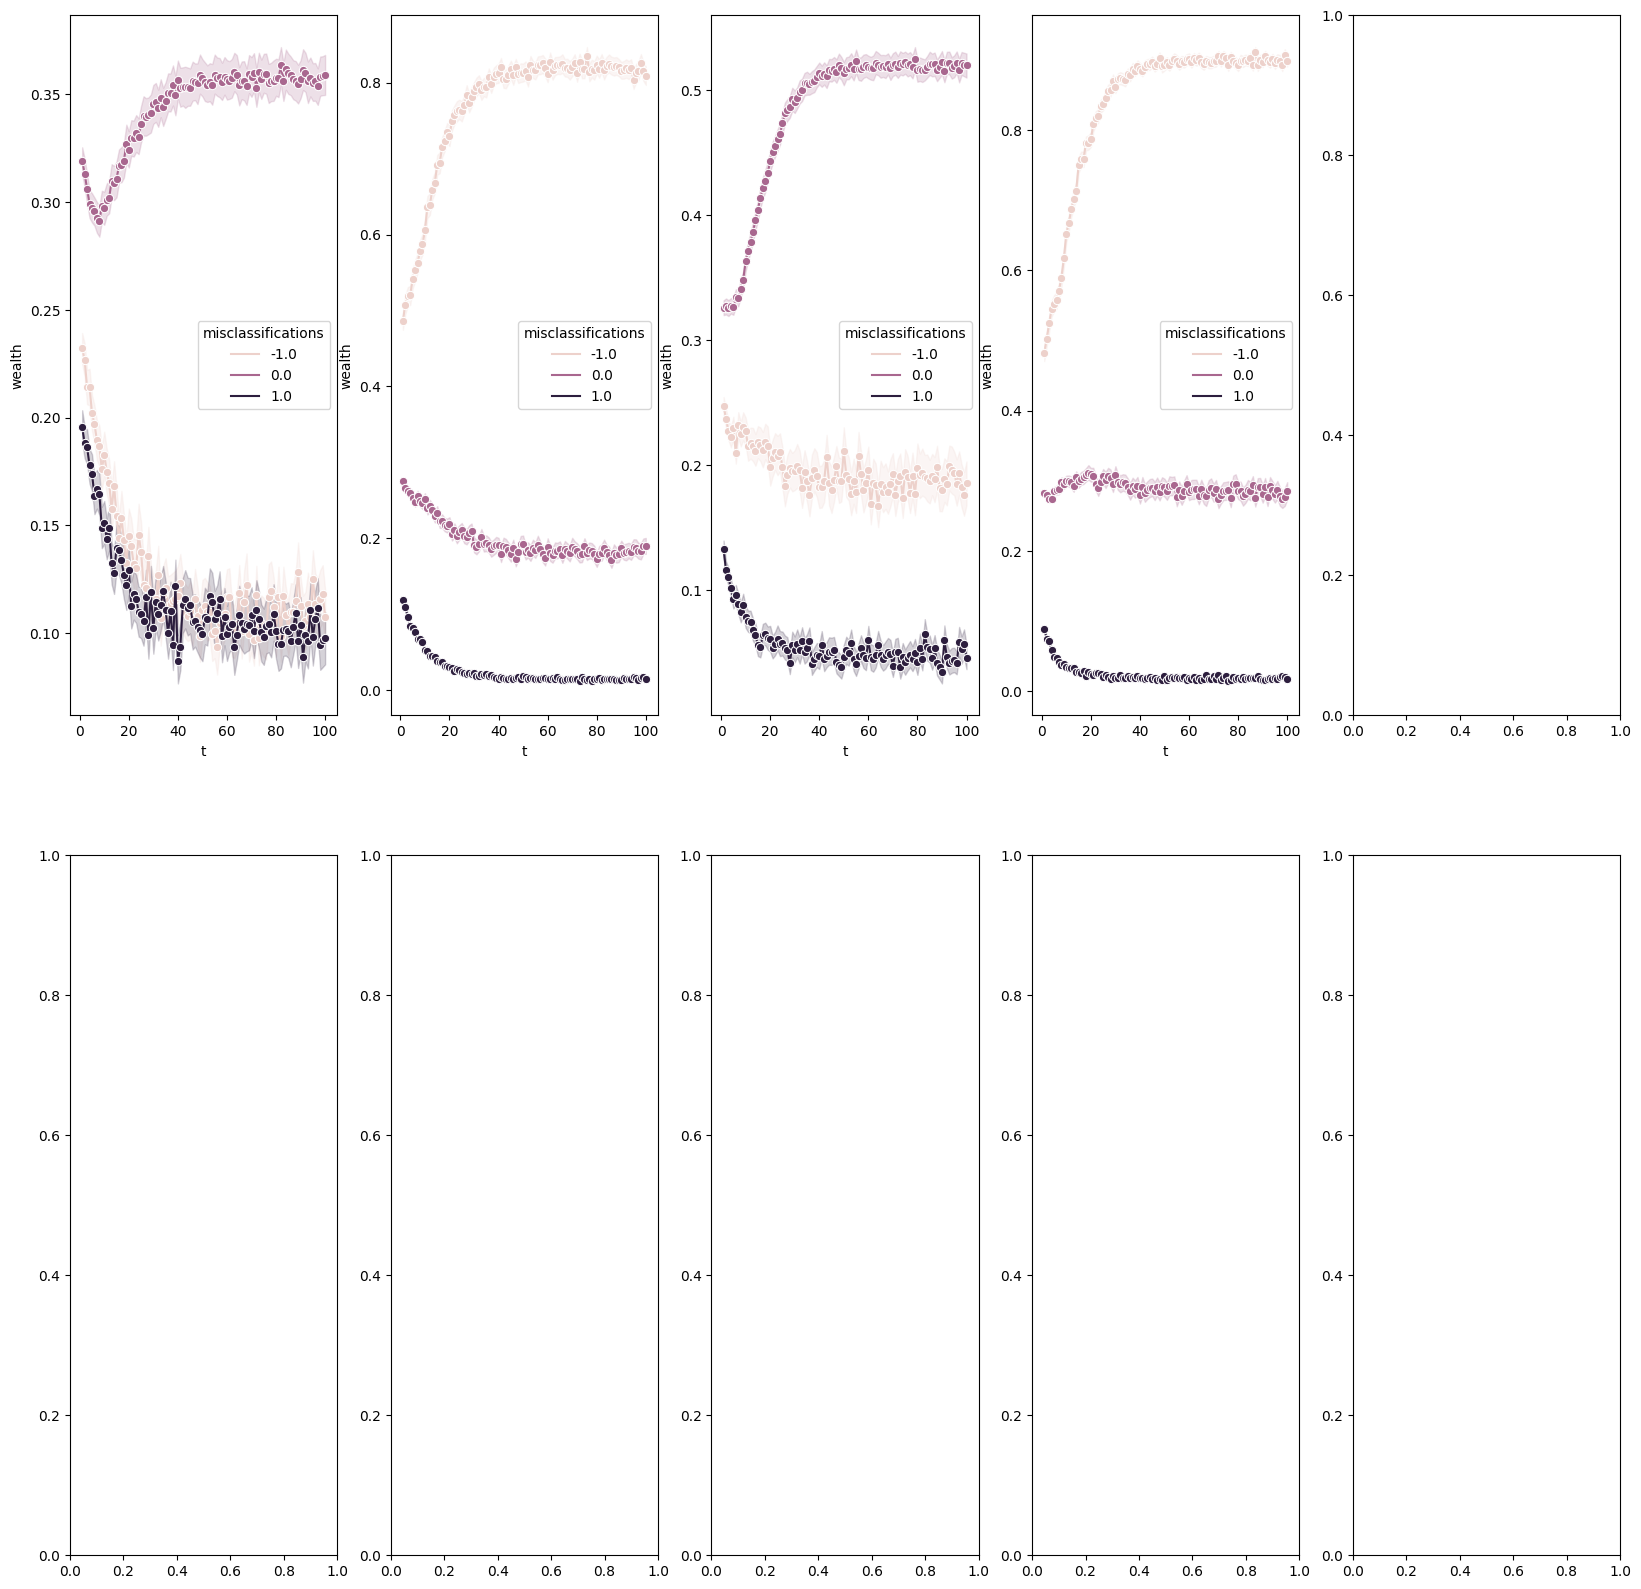

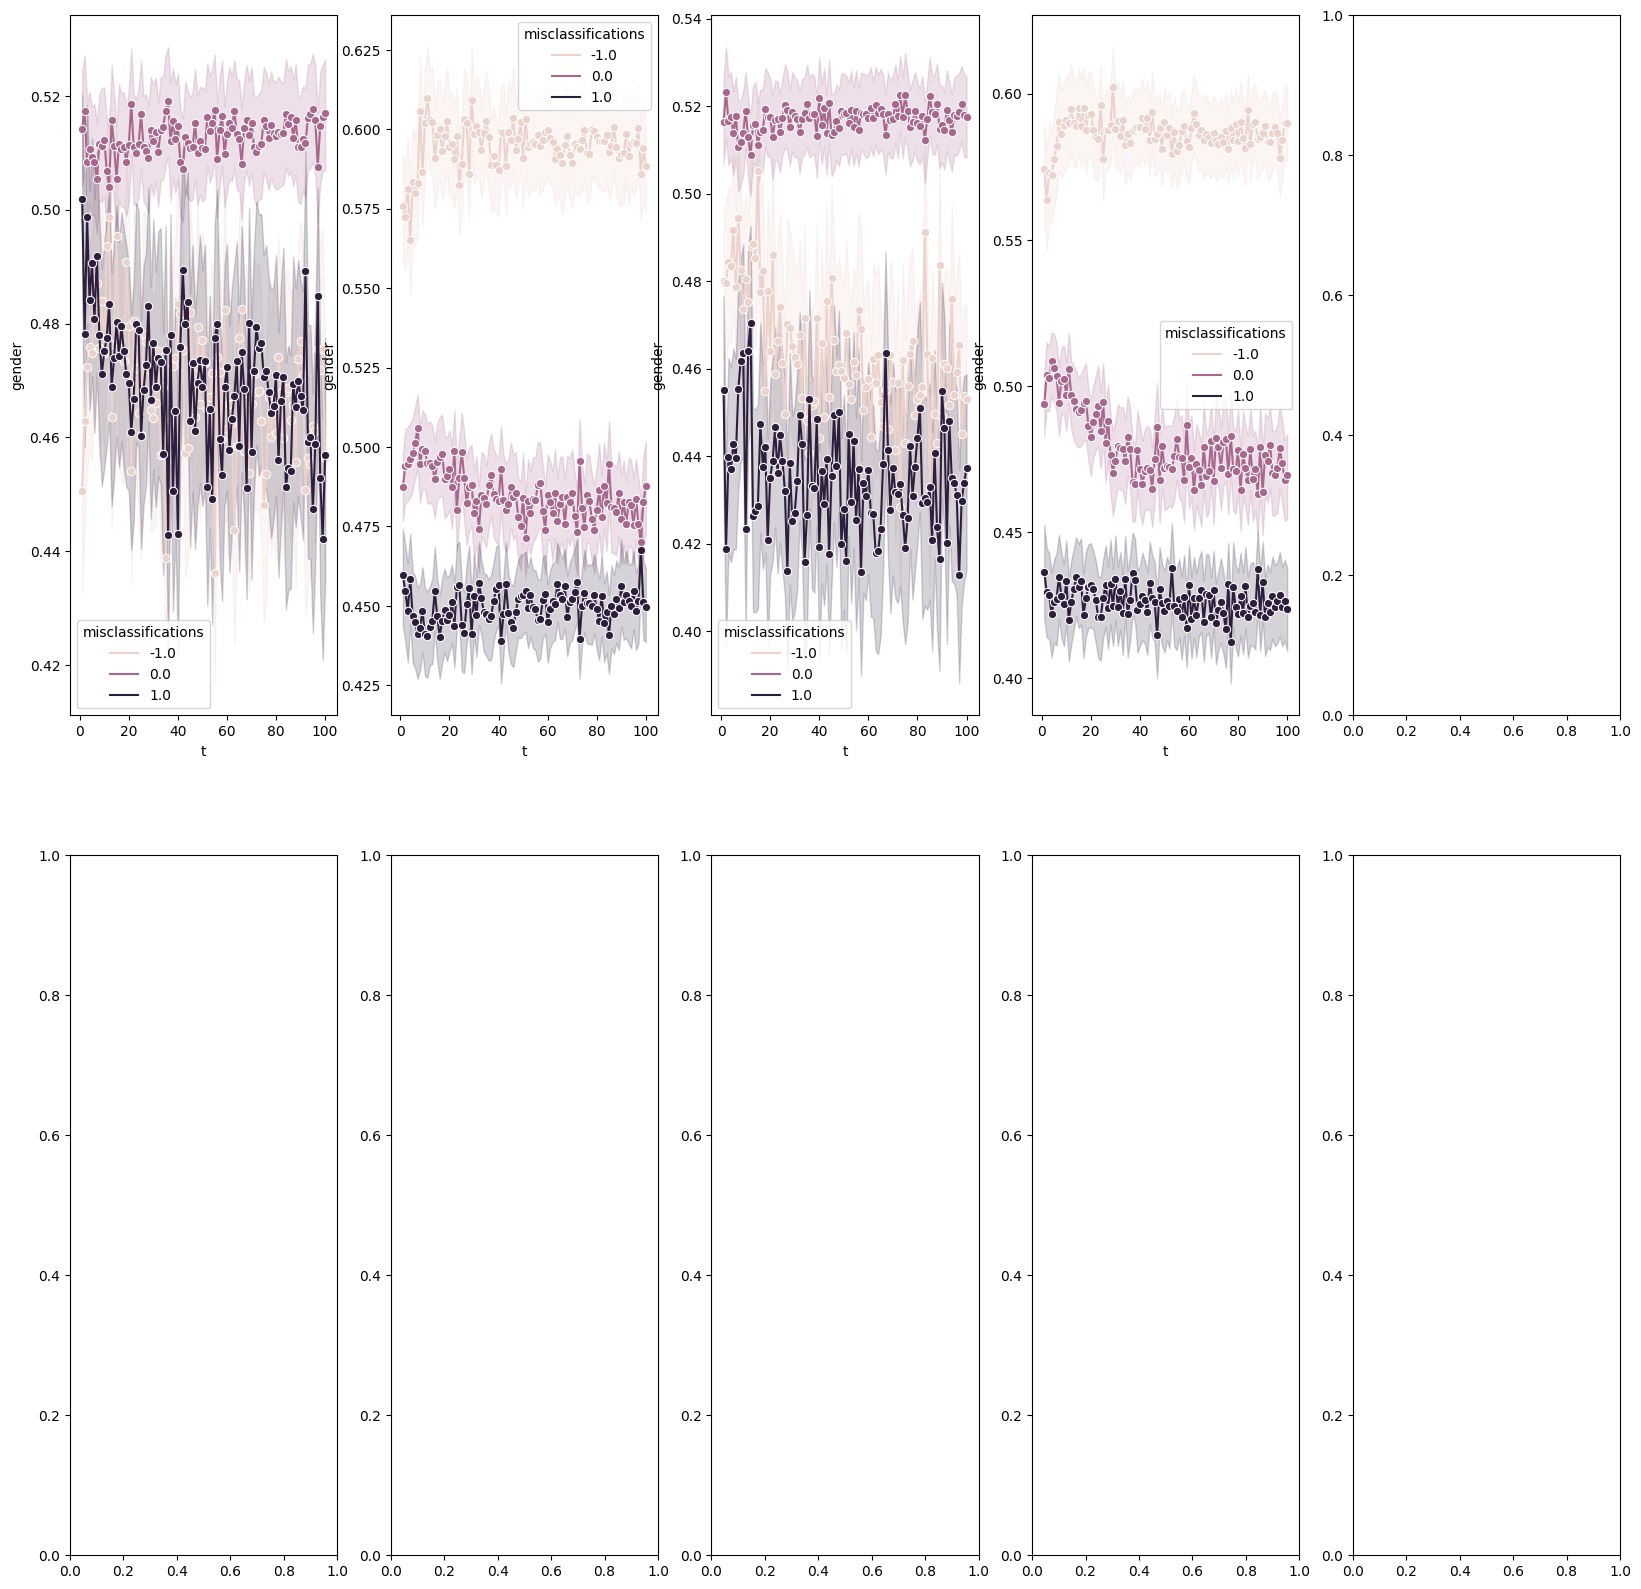

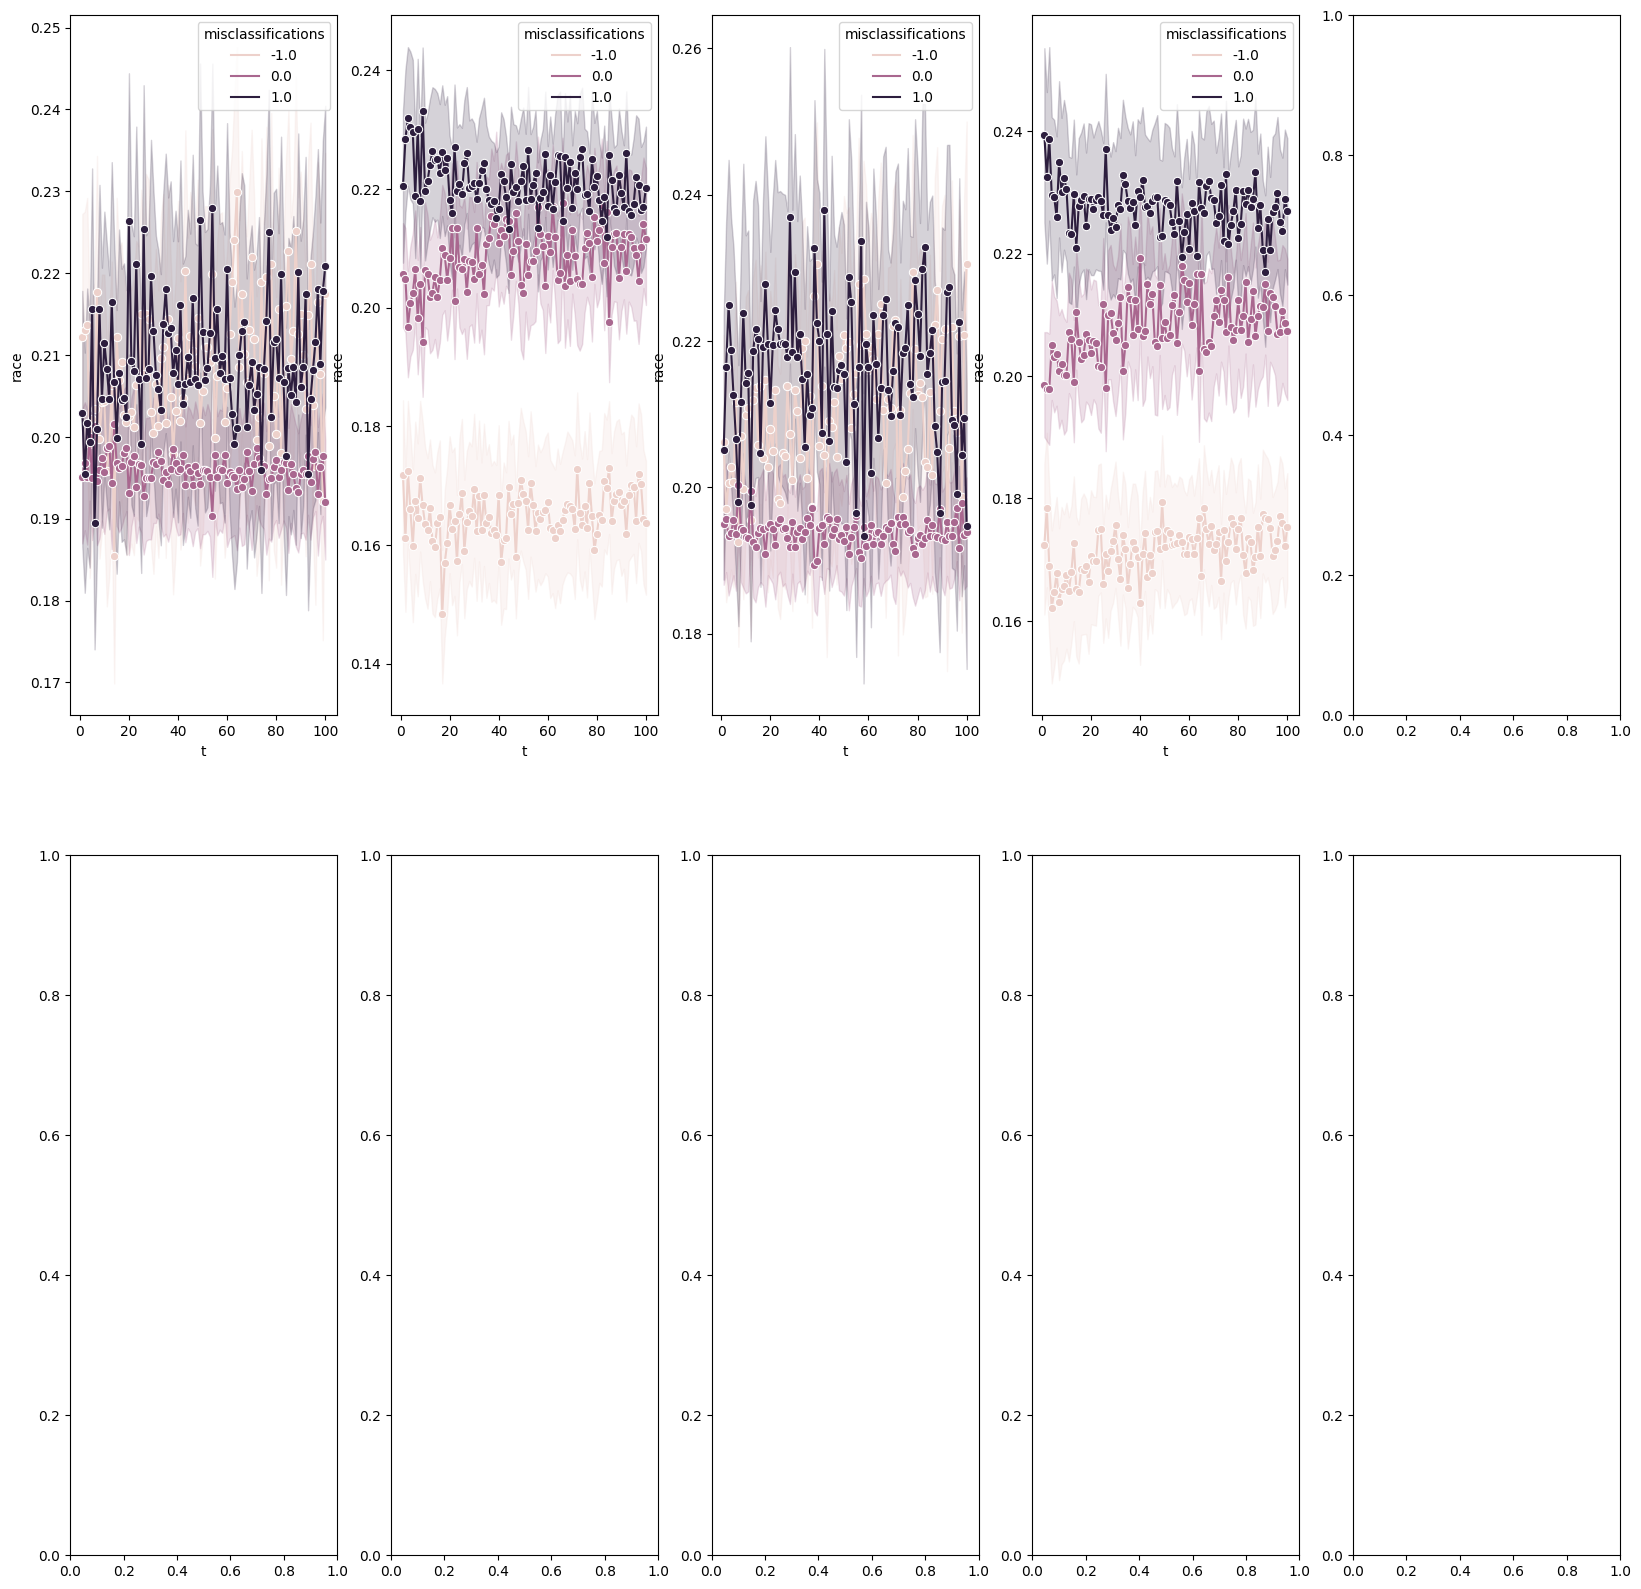

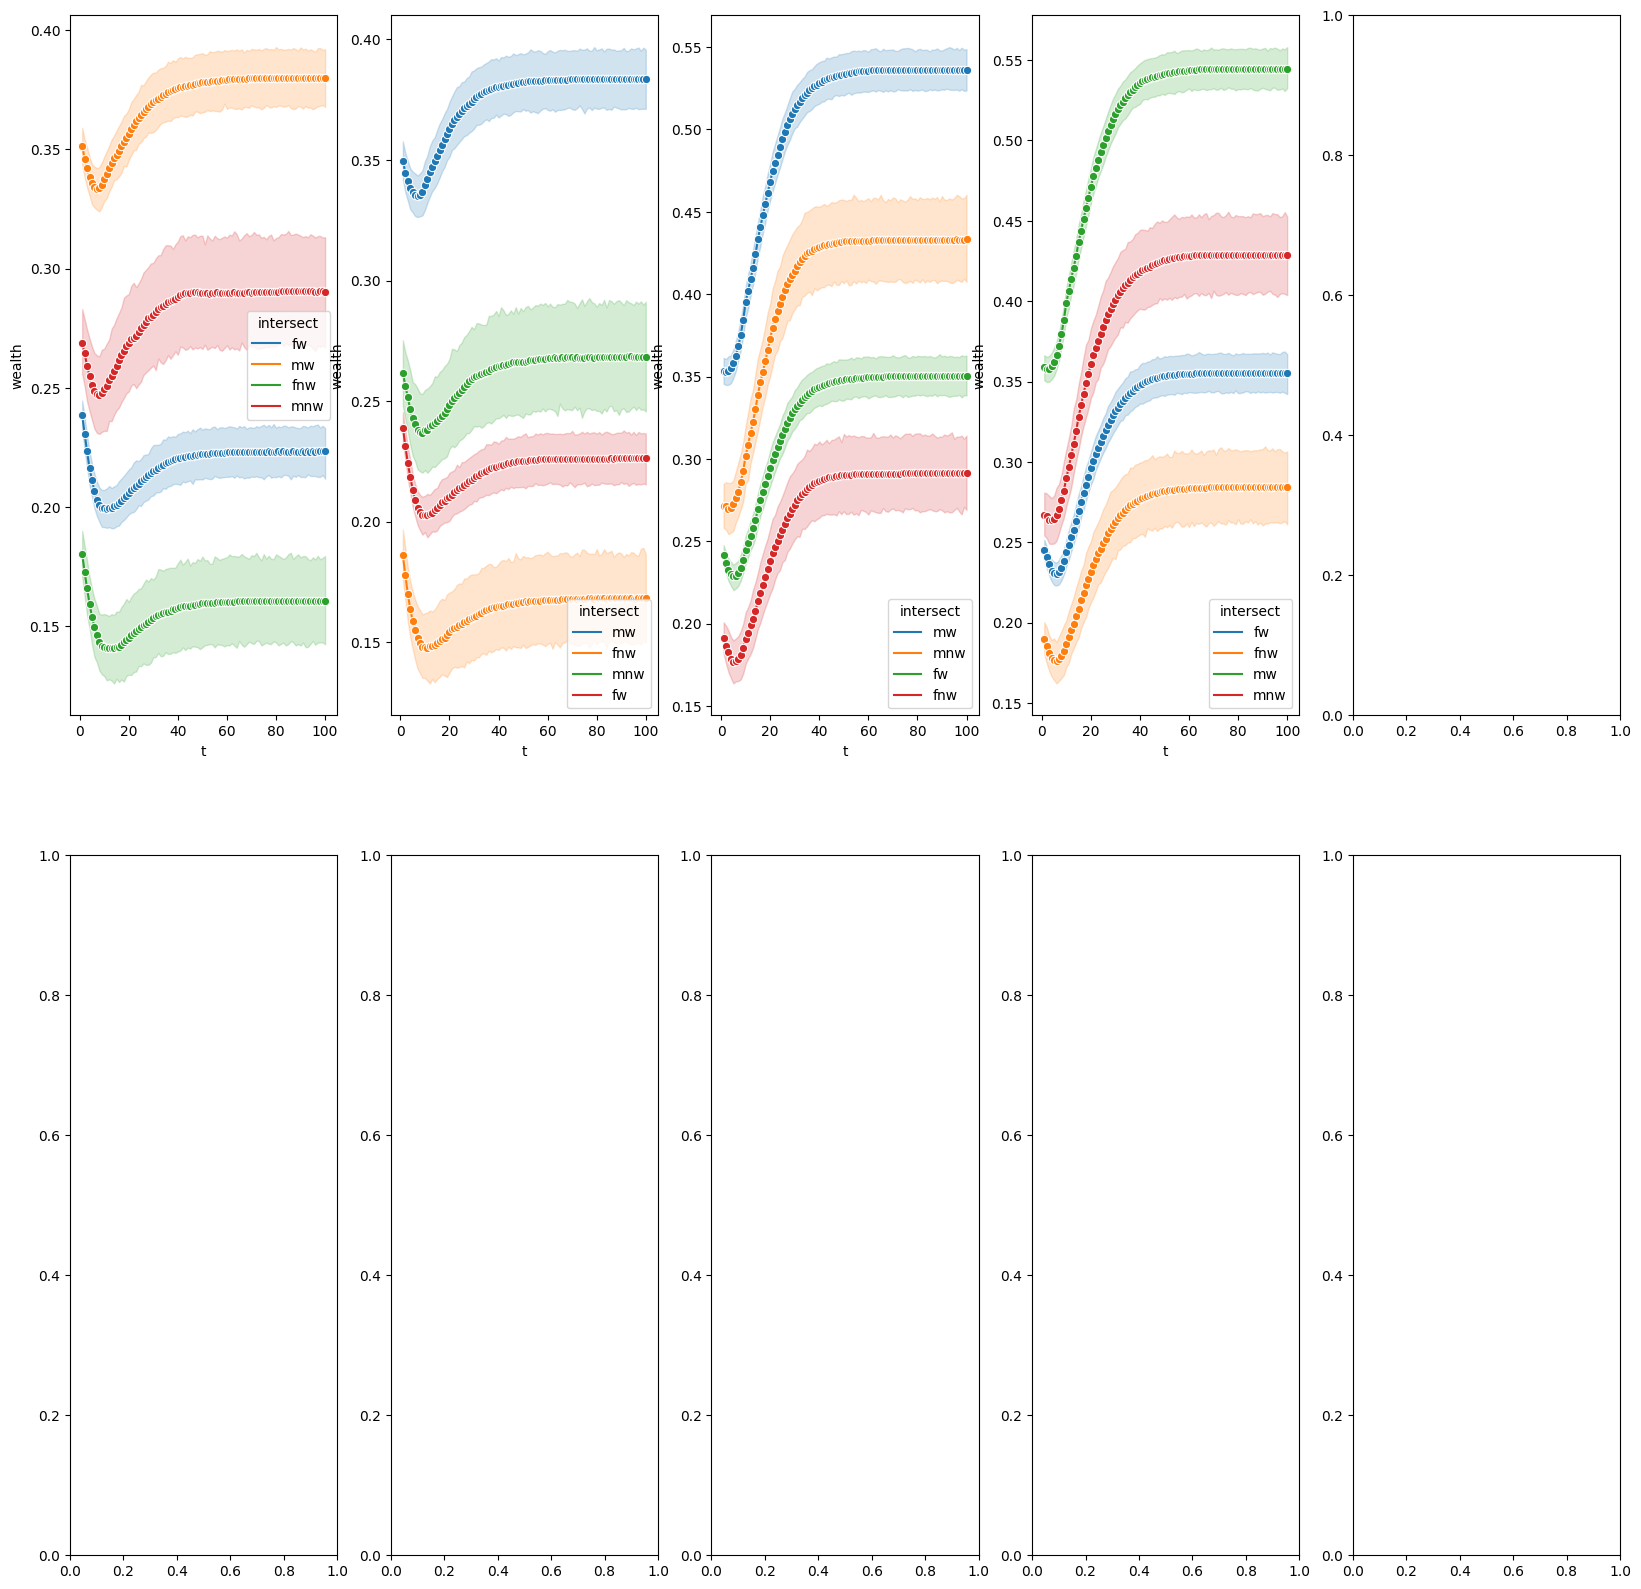

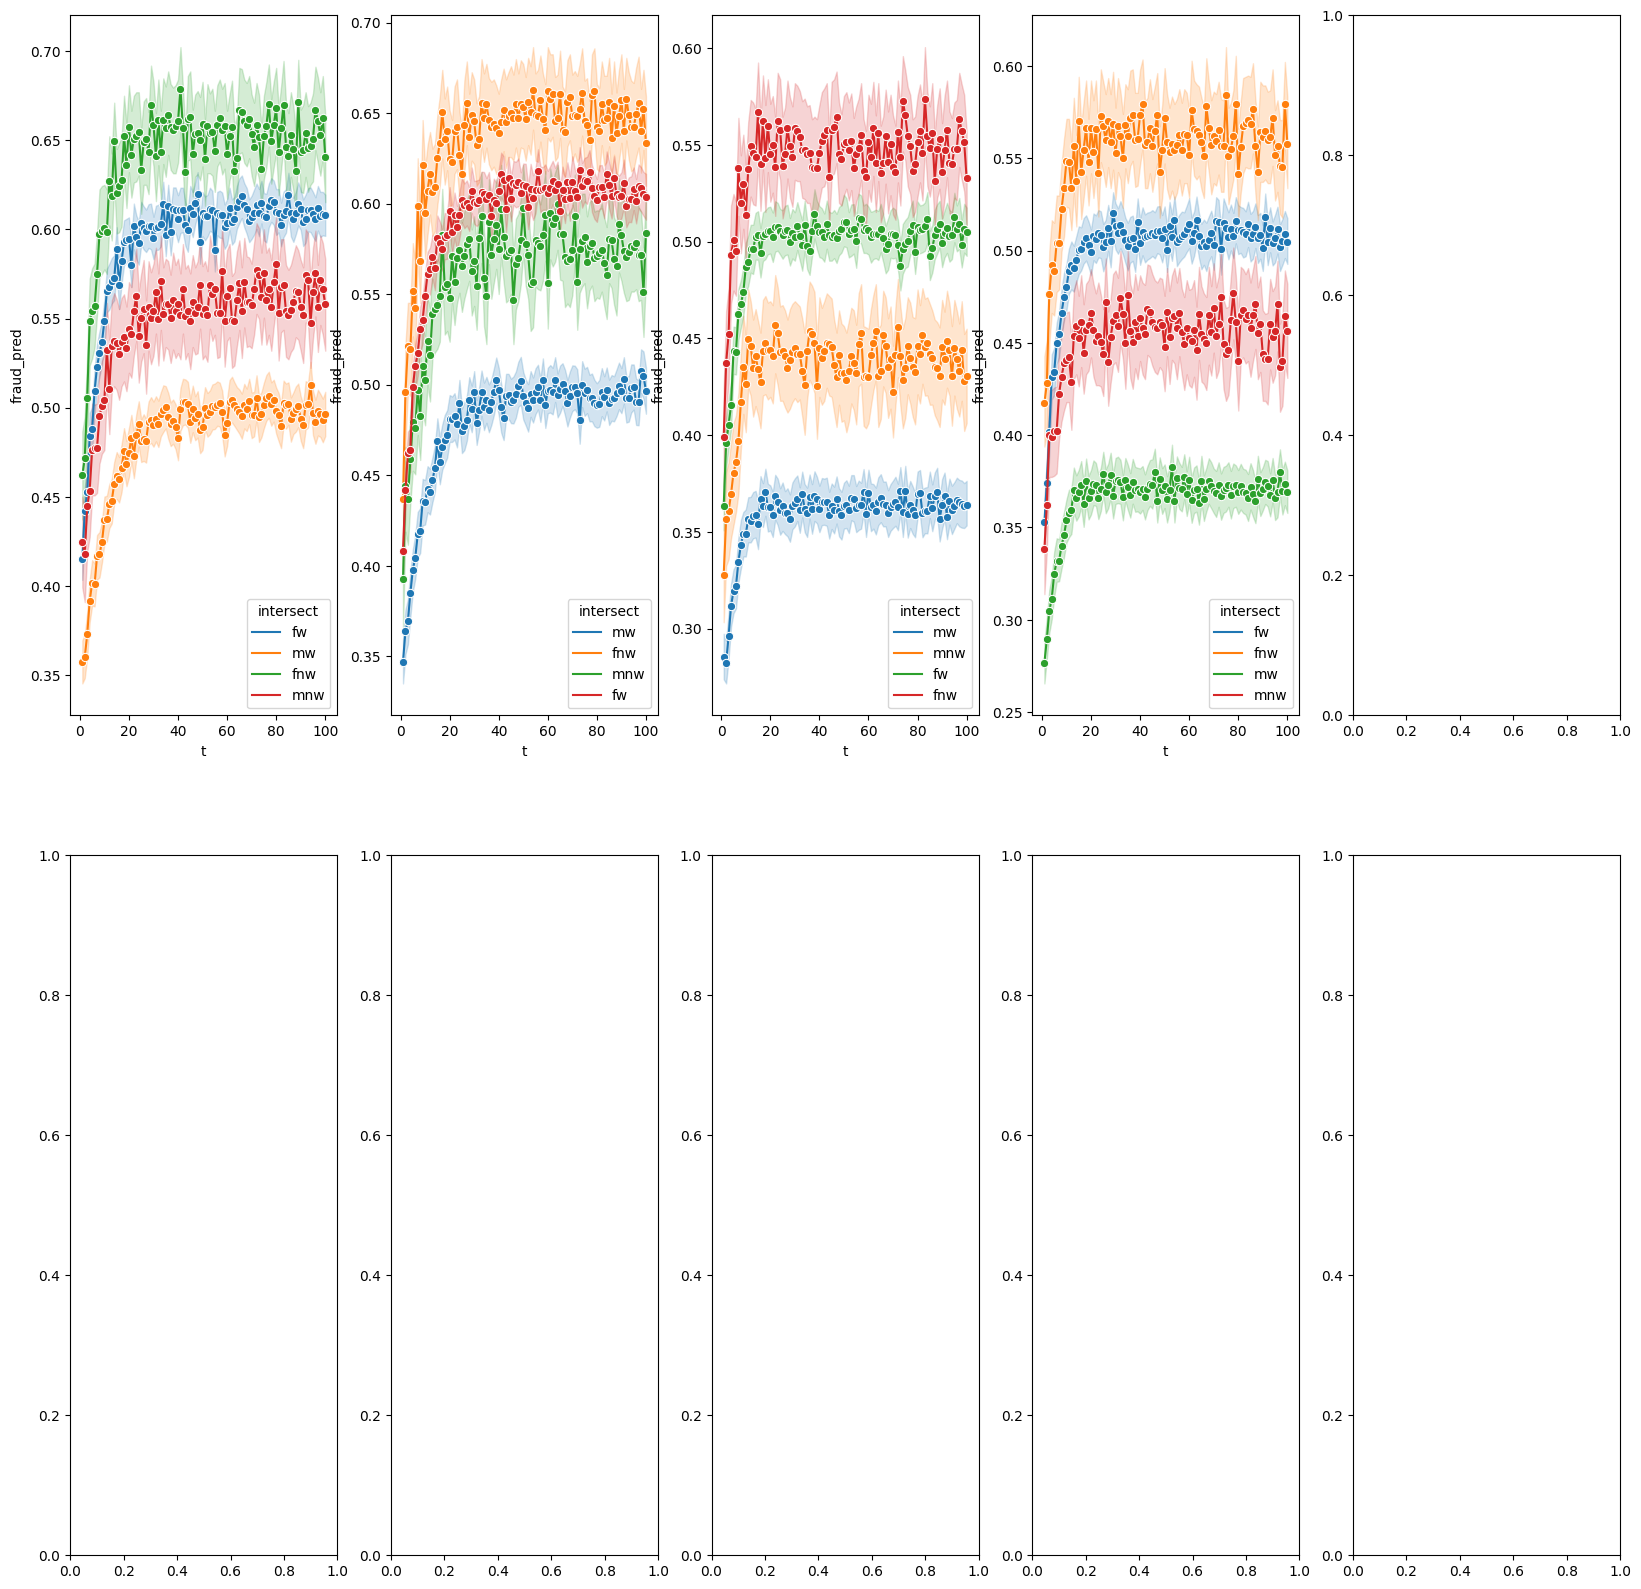

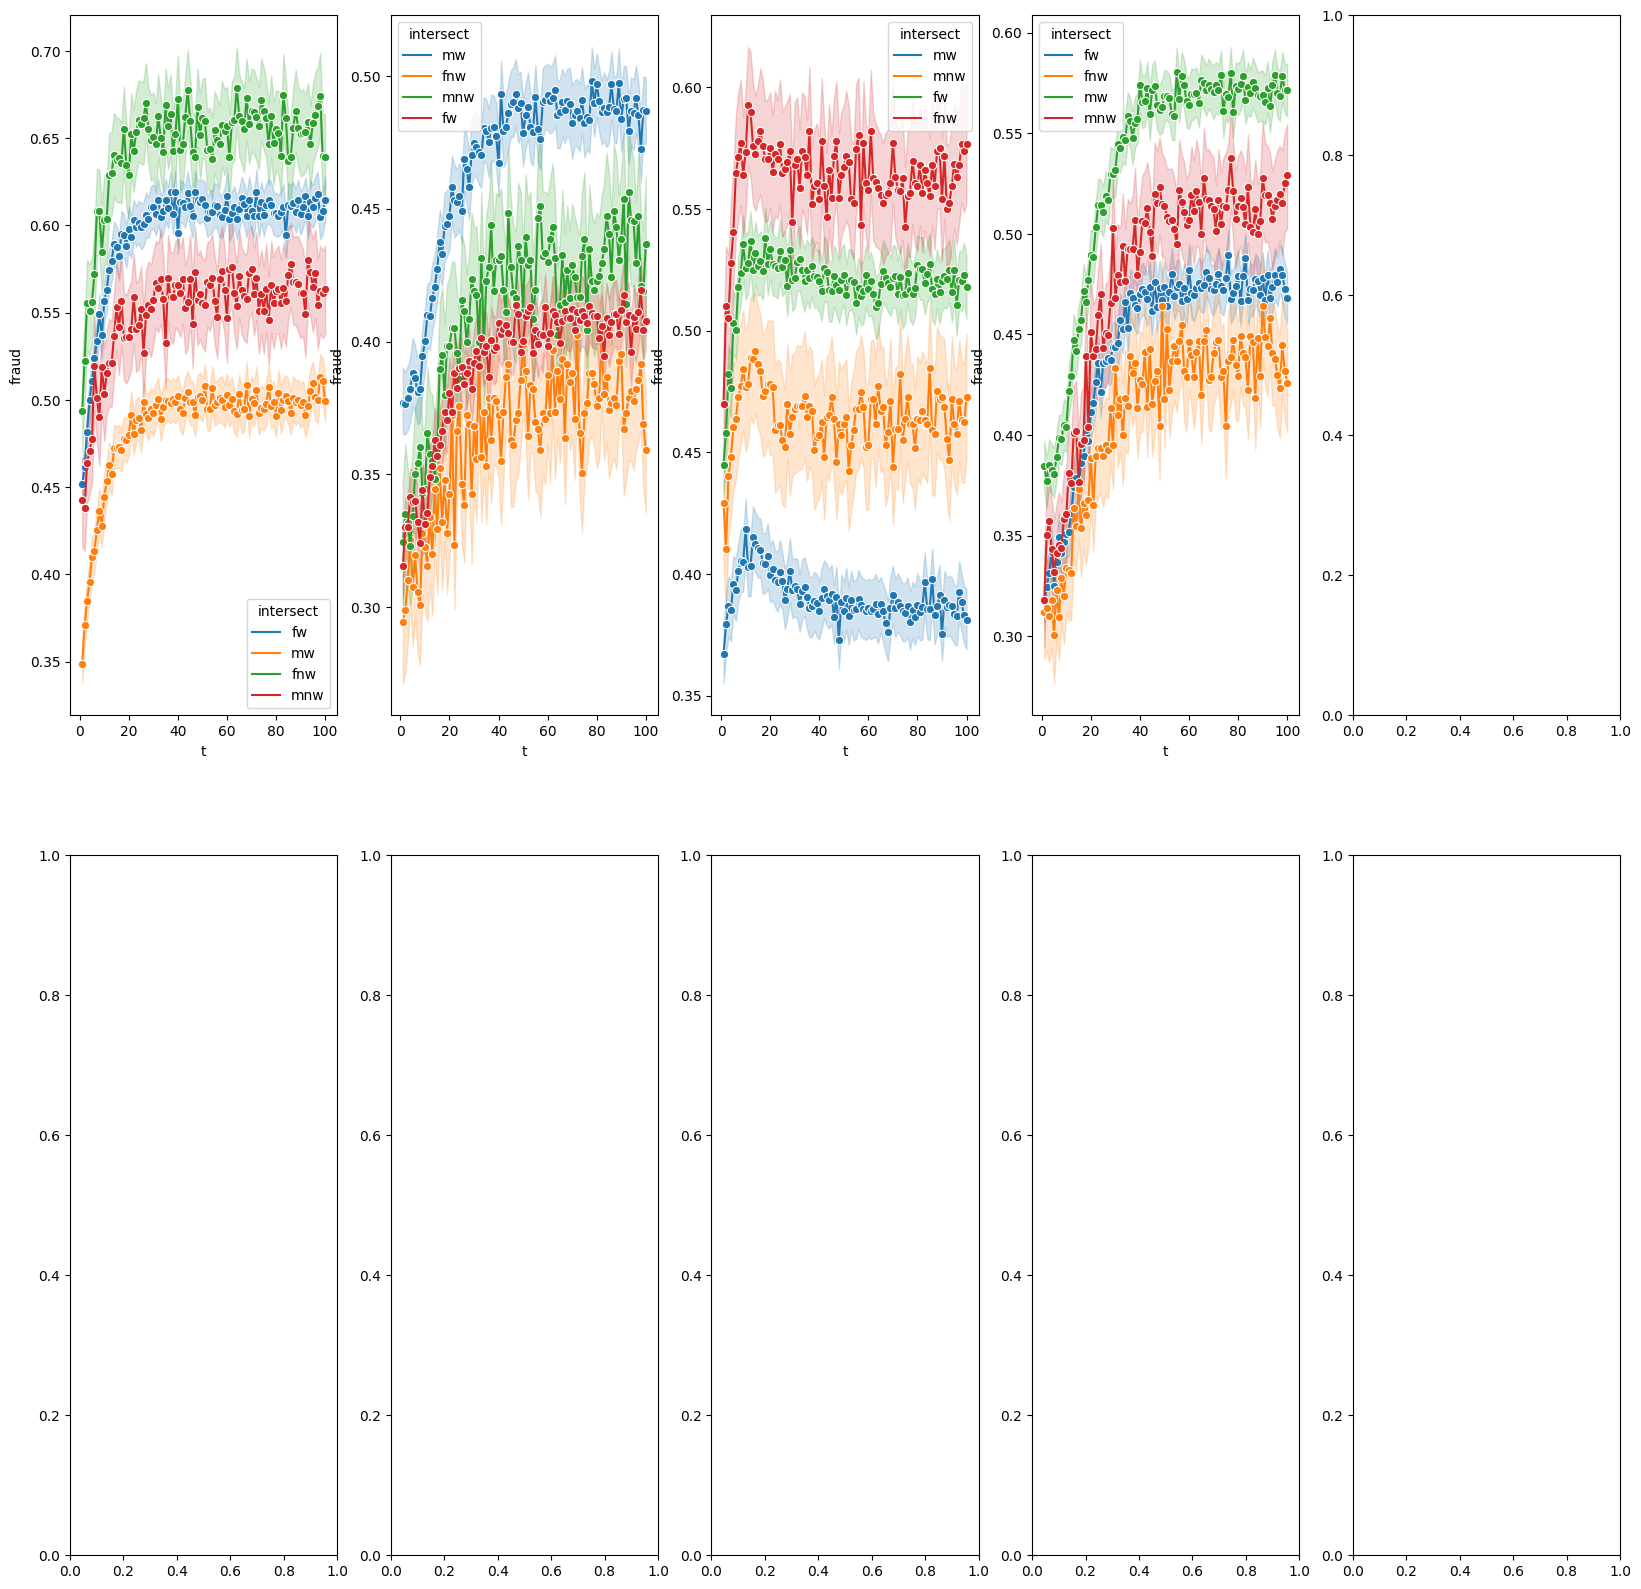

In [55]:
# viz(data, 'wealth', 'race')
# viz(data, 'fraud_pred', 'race')
# viz(data, 'fraud', 'race')

# viz(data, 'wealth', 'gender')
# viz(data, 'fraud_pred', 'gender')
# viz(data, 'fraud', 'gender')

viz(data, 'wealth', 'misclassifications')
viz(data, 'gender', 'misclassifications')
viz(data, 'race', 'misclassifications')

viz(data, 'wealth', 'intersect')
viz(data, 'fraud_pred', 'intersect')
viz(data, 'fraud', 'intersect')

# viz2(data, 'wealth')
# viz2(data, 'fraud')
# viz2(data, 'fraud_pred')

In [ ]:
# viz(df, df.index.get_level_values('t'), df['wealth'], abs(df['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])

# viz(df, df.index.get_level_values('t'), df['wealth'], df['intersect'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])

# viz(df, df.index.get_level_values('t'), df['fraud'], df['race'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])


# # viz(df_b, df.index.get_level_values('t'), df_b['wealth'], df_b['fraud'],title= 'Probabilitic Classifier') #, df_baseline['convicted'])
# viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
# viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
# viz2(df, df.index.get_level_values('t'), df['fraud'])
# viz2(df, df.index.get_level_values('t'), df['fraud_pred'])

/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

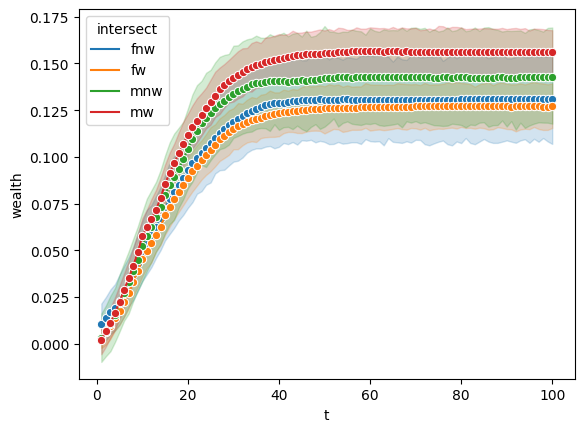

/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                        wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         2      1   -0.137860  0.37454         1.0    0.0     1       0   
                 2   -0.177885  0.37454         1.0    1.0     1       0   
                 3   -0.170102  0.37454         1.0    0.0     1       0   
                 4   -0.163818  0.37454         1.0    0.0     1       0   
                 5   -0.158711  0.37454         1.0    0.0     1       0   
...                        ...      ...         ...    ...   ...     ...   
19        749    96  -0.383715  0.37454         1.0    1.0     0       1   
                 97  -0.383709  0.37454         1.0    0.0     0       1   
                 98  -0.383681  0.37454         0.0    1.0     0       1   
                 99  -0.383577  0.37454         0.0    1.0     0       1   
                 100 -0.383637  0.37454         1.0    1.0     0       1   

           

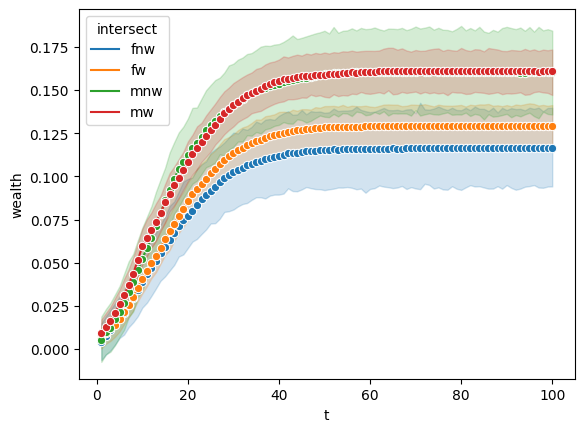

In [ ]:
df_xb = delta_function('intersect', 'wealth', data[2], data[0])
# print(df_xb)
viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'])

df_xb = delta_function('intersect', 'wealth', data[3], data[1])
print(df_xb)
viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'])

# df_xb = delta_function('intersect', 'wealth', data[4], data[6])
# print(df_xb)
# viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'])

# df_xb = delta_function('intersect', 'wealth', data[5], data[7])
# print(df_xb)
# viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'])

# df_xb = delta_function('intersect', 'wealth', data[7], data[9])
# print(df_xb)
# viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'])

In [ ]:
fig, axes = plt.subplots(2,2)

for no, i in enumerate([mlp, proba]):
    ax = axes[no-1]
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['eod_gender'], ax = ax)

    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['eod_race'])
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['dpd_race'])
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['dpd_gender'])
    # # plt.ylim(0,0.2)
    # plt.xlim(0,50)

plt.show()

